In [84]:
!ls
# https://github.com/j7kaurm/Intro_ML.git

Data        Week7.ipynb


In [85]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [86]:
#Brief problem statement: Review the car price data to predict what are the best features to predict the car price
#The model will use linear regression since it is a simple model that can be interprated easily.
#It gives much more transparent results that can be easily explained. 

# Data import. Kaggle dataset for CarPrice
df = pd.read_csv("Data/CarPrice_Assignment.csv") 

# We will look at car price data, and look for what features best predict car price

In [87]:
# See data information (EDA)/ data inspection
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [88]:
# Inspect Null values

df.isnull().sum()
# The dataset does not have any null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

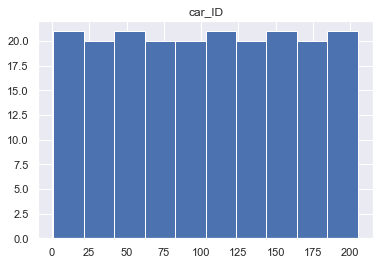

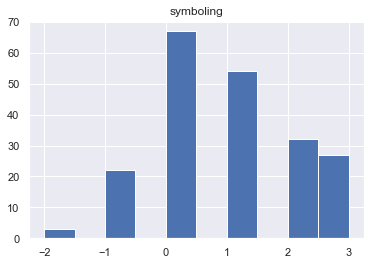

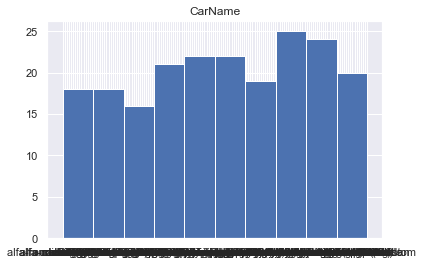

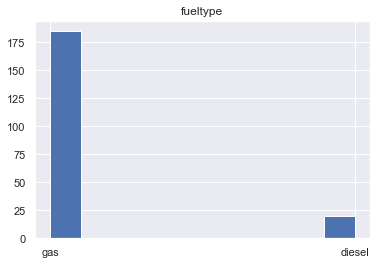

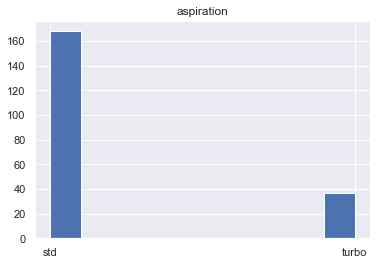

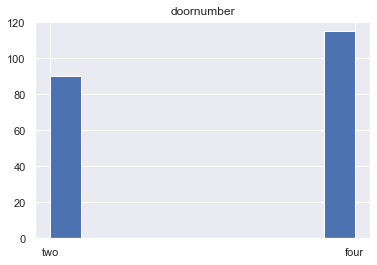

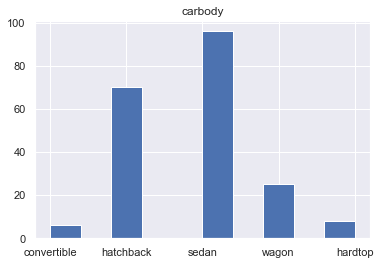

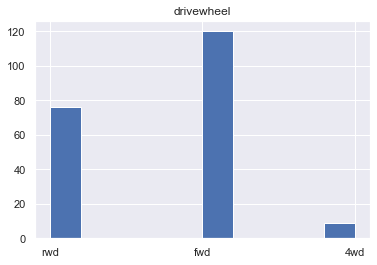

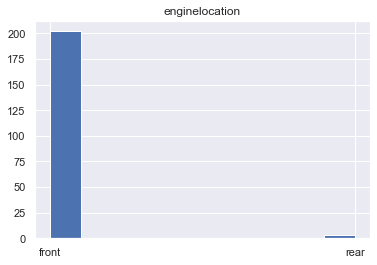

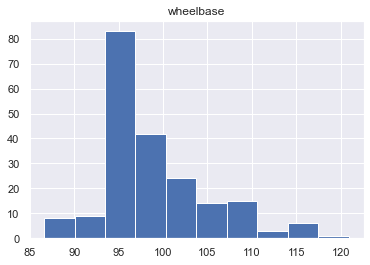

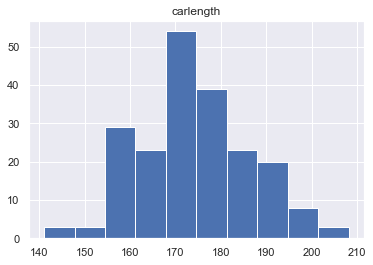

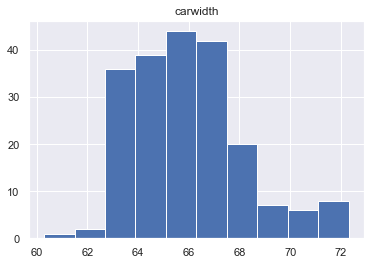

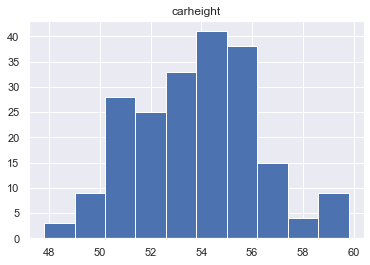

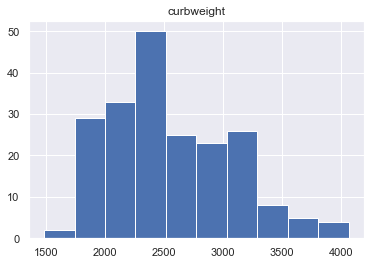

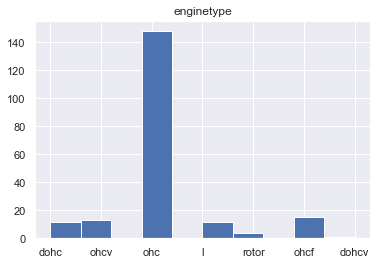

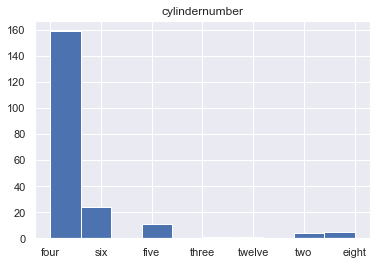

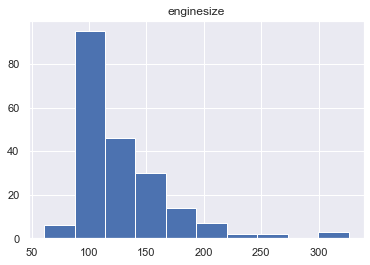

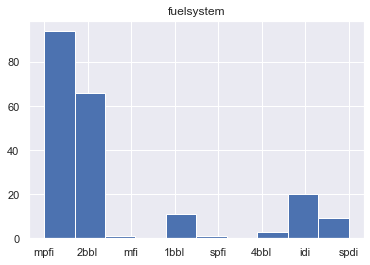

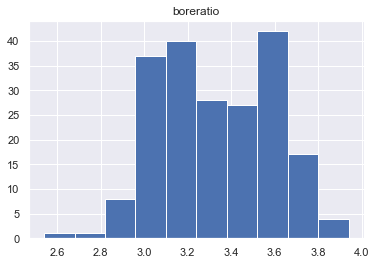

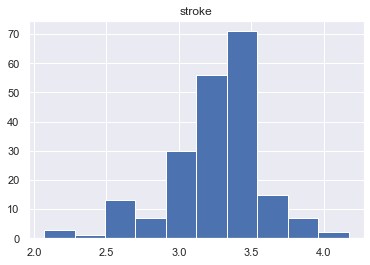

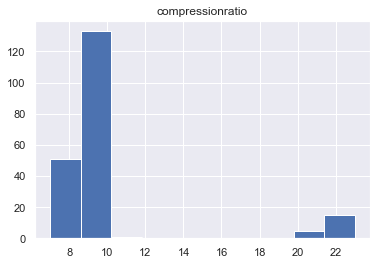

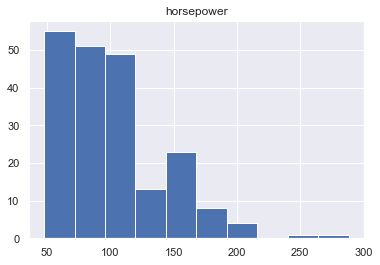

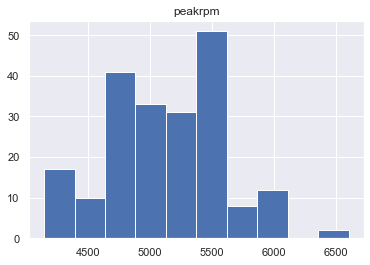

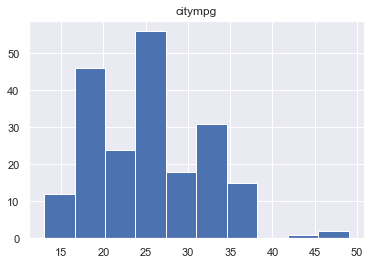

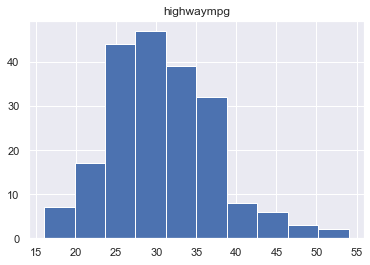

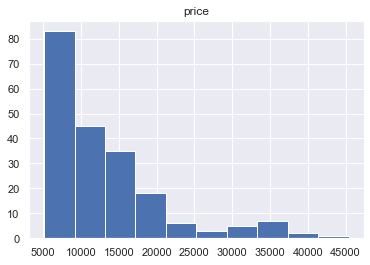

In [89]:
for a in df.columns:
    df[a].hist()
    plt.title(a)
    plt.show()
    
    # Data cleaning/ dropping off features that are not useful for this model
    # Using visualization to help with this cleaning activity
    # car_ID is not a useful feature and adds to the noise along with car name, aspiration and symboling

In [90]:
# Remove columns to help with unnecessary noise
columns_drop = ['aspiration', 'car_ID', 'symboling', 'CarName']
df = df.drop(columns=columns_drop, axis=1)

In [98]:
# Split data into test set and training set (25% split)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.25, random_state=0)


In [92]:
# Find the R^2 values of each Column (k=1 feature in equation)
# Higher R^2 value means a better fit and the included features have a good relationship with the dependent variable
best = ['',0]
for p in df:
    model  = smf.ols(formula='price~'+p, data=train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

# Price is the best feature and wew investigate more by looking at the correlation matrix

fueltype 0.023670750300570864
doornumber 0.004978826715765661
carbody 0.34373815278649544
drivewheel 0.47076770087819064
enginelocation 0.2480416903572491
wheelbase 0.19707383919704902
carlength 0.3627647658166868
carwidth 0.5471919046554878
carheight 0.012648283505893865
curbweight 0.654703137603832
enginetype 0.1309025277869741
cylindernumber 0.645236339341431
enginesize 0.731727203453728
fuelsystem 0.3762516164177565
boreratio 0.30444358051435927
stroke 0.010497840098811606
compressionratio 0.013923035934691796
horsepower 0.6473209191534355
peakrpm 0.004245655077924404
citympg 0.4925305494377158
highwaympg 0.5190331836849672
price 1.0
best: ['price', 1.0]


In [93]:
# Look at correlation matrix
print(train.corr())

                  wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase          1.000000   0.879594  0.831618   0.641897    0.781055   
carlength          0.879594   1.000000  0.869758   0.505492    0.892615   
carwidth           0.831618   0.869758  1.000000   0.355976    0.912272   
carheight          0.641897   0.505492  0.355976   1.000000    0.343143   
curbweight         0.781055   0.892615  0.912272   0.343143    1.000000   
enginesize         0.482574   0.669601  0.711369   0.100141    0.862214   
boreratio          0.500375   0.695973  0.558904   0.308756    0.677829   
stroke             0.313096   0.243782  0.276198  -0.091733    0.302049   
compressionratio   0.338626   0.246608  0.264811   0.296180    0.185859   
horsepower         0.249830   0.508499  0.523739  -0.092711    0.689791   
peakrpm           -0.436767  -0.389084 -0.363519  -0.253850   -0.331126   
citympg           -0.394548  -0.617618 -0.620566  -0.048739   -0.744720   
highwaympg        -0.5127

<AxesSubplot:>

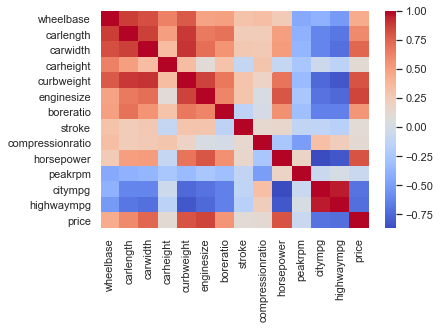

In [94]:
sns.heatmap(train.corr(), annot=False, cmap='coolwarm')

# Based on the correlation matrix and the heat map, the following are noted to be the best features for the CarPrice Model.

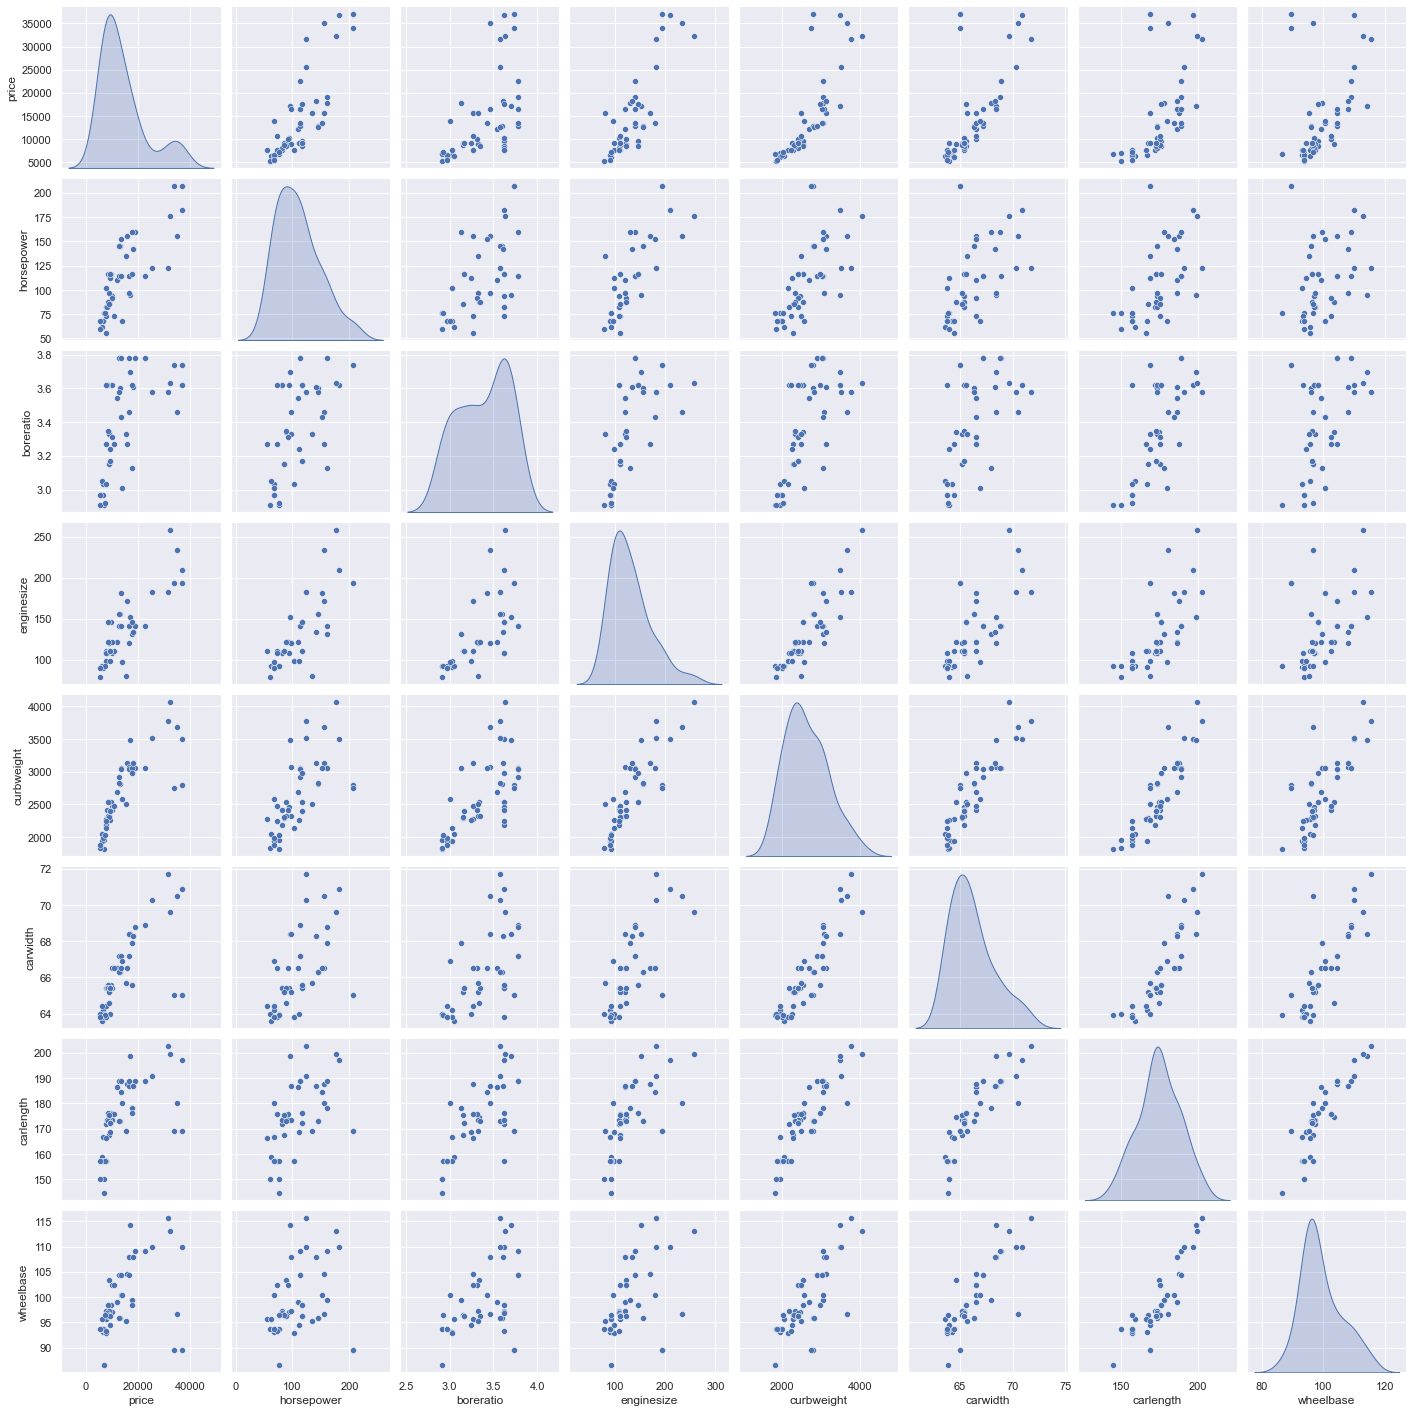

In [95]:
# Based on heatmap, pick highest correlation to price
subset = ['price','horsepower', 'boreratio', 'enginesize', 'curbweight', 'carwidth', 'carlength', 'wheelbase']
sns.pairplot(train[subset], diag_kind="kde")
plt.show()

In [99]:
# Use enginesize and carwidth for the model formula, since they are the best predictors
# Apply the model to the test data and look at R^2

test_model = smf.ols(formula='price ~ enginesize + carwidth', data=test).fit()

print(test_model.summary())
print(test_model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     321.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           3.78e-55
Time:                        11:12:24   Log-Likelihood:                -1468.8
No. Observations:                 154   AIC:                             2944.
Df Residuals:                     151   BIC:                             2953.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.165e+04   1.15e+04     -5.358      0.0

In [97]:
# Based on the data-set picked, it looks like engine size and car width are strongly corelated with car price and
# can be used for a prediction model